In [1]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


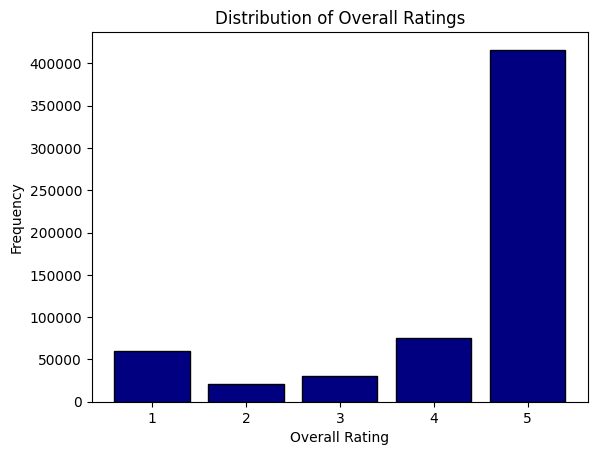

In [2]:
# Load the given dataset
df = pd.read_json("Appliances.json", lines = True)
df.head()

# initial preprocessing

# Fill missing values in 'style,' 'reviewerName,' 'reviewText,' and 'summary' with empty strings
columns_to_fill = ['style', 'reviewerName', 'reviewText', 'summary']
df[columns_to_fill] = df[columns_to_fill].astype(str)
df[columns_to_fill] = df[columns_to_fill].replace('', np.nan)

# Convert 'vote' to numeric (assuming 'NaN' means 0)
df['vote'] = df['vote'].str.replace(',', '', regex=True).fillna(0).astype(int)

# Convert reviewTime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

# Delete the 'image' column
df.drop('image', axis=1, inplace=True)

# Histogram for overall ratings
plt.hist(df['overall'], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color = 'navy', edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.xticks(range(1, 6))
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         602777 non-null  int64         
 1   vote            602777 non-null  int64         
 2   verified        602777 non-null  bool          
 3   reviewTime      602777 non-null  datetime64[ns]
 4   reviewerID      602777 non-null  object        
 5   asin            602777 non-null  object        
 6   style           602777 non-null  object        
 7   reviewerName    602777 non-null  object        
 8   reviewText      602777 non-null  object        
 9   summary         602777 non-null  object        
 10  unixReviewTime  602777 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 46.6+ MB


In [4]:
y = df['overall']
X = df.drop(columns='overall')

In [5]:
# Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = undersampler.fit_resample(X, y)

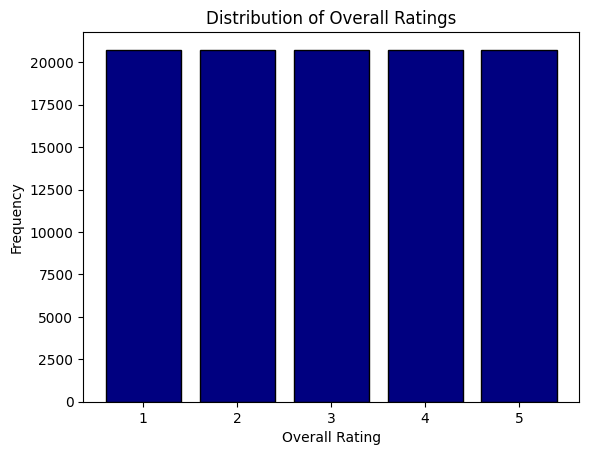

In [6]:
# Histogram for overall ratings
plt.hist(y_resampled, bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color = 'navy', edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.xticks(range(1, 6))
plt.show()

In [7]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103670 entries, 211668 to 370122
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   vote            103670 non-null  int64         
 1   verified        103670 non-null  bool          
 2   reviewTime      103670 non-null  datetime64[ns]
 3   reviewerID      103670 non-null  object        
 4   asin            103670 non-null  object        
 5   style           103670 non-null  object        
 6   reviewerName    103670 non-null  object        
 7   reviewText      103670 non-null  object        
 8   summary         103670 non-null  object        
 9   unixReviewTime  103670 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 8.0+ MB


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [9]:
"""
With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.
"""

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)

# Lemmatized TFIDFVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)

# Stemmatized TFIDFVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)



# 1. Logistic Regression


In [10]:
# a) Lemmatized CountVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_lem_CV_train, y_train)
y_pred_train_logistic_lem_cv = logistic_model.predict(X_lem_CV_train)
y_pred_test_logistic_lem_cv = logistic_model.predict(X_lem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_cv)
logistic_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_cv = accuracy_score(y_train, y_pred_train_logistic_lem_cv)
accuracy_test_logistic_lem_cv = accuracy_score(y_test, y_pred_test_logistic_lem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:\n", logistic_report_train_lem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:\n", logistic_report_test_lem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_logistic_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_logistic_lem_cv)



Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.73      0.78      0.93      0.76      0.85      0.72     14568
          2       0.69      0.62      0.93      0.65      0.76      0.55     14482
          3       0.67      0.61      0.92      0.63      0.75      0.54     14371
          4       0.62      0.61      0.91      0.62      0.74      0.54     14548
          5       0.69      0.79      0.91      0.73      0.85      0.71     14600

avg / total       0.68      0.68      0.92      0.68      0.79      0.61     72569


Logistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.55      0.60      0.88      0.58      0.73      0.51      6166
          2       0.40      0.34      0.87      0.37      0.54      0.28      6252
      

In [11]:
# b) Lemmatized TFIDFVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_lem_RFID_train, y_train)
y_pred_train_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_train)
y_pred_test_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_rfid)
logistic_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_rfid = accuracy_score(y_train, y_pred_train_logistic_lem_rfid)
accuracy_test_logistic_lem_rfid = accuracy_score(y_test, y_pred_test_logistic_lem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", logistic_report_train_lem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", logistic_report_test_lem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_logistic_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_logistic_lem_rfid)

Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.65      0.73      0.90      0.69      0.81      0.65     14568
          2       0.56      0.54      0.89      0.55      0.69      0.46     14482
          3       0.56      0.53      0.90      0.54      0.69      0.46     14371
          4       0.57      0.52      0.90      0.54      0.68      0.45     14548
          5       0.68      0.72      0.91      0.70      0.81      0.64     14600

avg / total       0.60      0.61      0.90      0.60      0.74      0.53     72569


Logistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.63      0.88      0.59      0.75      0.54      6166
          2       0.40      0.37      0.86      0.38      0.56      0.30      6252


In [12]:
# c) Stemmatized CountVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_stem_CV_train, y_train)
y_pred_train_logistic_stem_cv = logistic_model.predict(X_stem_CV_train)
y_pred_test_logistic_stem_cv = logistic_model.predict(X_stem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_cv)
logistic_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_cv = accuracy_score(y_train, y_pred_train_logistic_stem_cv)
accuracy_test_logistic_stem_cv = accuracy_score(y_test, y_pred_test_logistic_stem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:\n", logistic_report_train_stem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:\n", logistic_report_test_stem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_logistic_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_logistic_stem_cv)

Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.70      0.75      0.92      0.73      0.83      0.68     14568
          2       0.64      0.56      0.92      0.60      0.72      0.50     14482
          3       0.62      0.55      0.92      0.58      0.71      0.49     14371
          4       0.58      0.57      0.90      0.58      0.72      0.50     14548
          5       0.66      0.77      0.90      0.71      0.83      0.68     14600

avg / total       0.64      0.64      0.91      0.64      0.76      0.57     72569


Logistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.60      0.88      0.58      0.73      0.52      6166
          2       0.40      0.34      0.87      0.37      0.55      0.28      6252
    

In [13]:
# d) Stemmatized TFIDFVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_stem_RFID_train, y_train)
y_pred_train_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_train)
y_pred_test_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_rfid)
logistic_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_rfid = accuracy_score(y_train, y_pred_train_logistic_stem_rfid)
accuracy_test_logistic_stem_rfid = accuracy_score(y_test, y_pred_test_logistic_stem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", logistic_report_train_stem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", logistic_report_test_stem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_logistic_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_logistic_stem_rfid)

Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.71      0.90      0.67      0.80      0.63     14568
          2       0.53      0.51      0.89      0.52      0.67      0.43     14482
          3       0.54      0.50      0.89      0.52      0.67      0.43     14371
          4       0.55      0.50      0.90      0.52      0.67      0.43     14548
          5       0.67      0.71      0.91      0.69      0.80      0.63     14600

avg / total       0.58      0.59      0.90      0.58      0.72      0.51     72569


Logistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.63      0.88      0.60      0.75      0.54      6166
          2       0.40      0.37      0.86      0.39      0.57      0.31      625

## Summary - Logistic Regression

In [14]:
# a) Lemmatized CountVectorized data
logistic_report_train_lem_cv_imbalanced_last = [accuracy_train_logistic_lem_cv*100] + [float(value) for value in logistic_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
logistic_report_test_lem_cv_imbalanced_last = [accuracy_test_logistic_lem_cv*100] + [float(value) for value in logistic_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_cv_imbalanced = pd.DataFrame([logistic_report_train_lem_cv_imbalanced_last, logistic_report_test_lem_cv_imbalanced_last], columns=column_names)
final_logistic_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_logistic_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_cv_imbalanced = final_logistic_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
logistic_report_train_lem_rfid_imbalanced_last = [accuracy_train_logistic_lem_rfid*100] + [float(value) for value in logistic_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_lem_rfid_imbalanced_last = [accuracy_test_logistic_lem_rfid*100] + [float(value) for value in logistic_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_rfid_imbalanced = pd.DataFrame([logistic_report_train_lem_rfid_imbalanced_last, logistic_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_logistic_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_rfid_imbalanced = final_logistic_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
logistic_report_train_stem_cv_imbalanced_last = [accuracy_train_logistic_stem_cv*100] + [float(value) for value in logistic_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_cv_imbalanced_last = [accuracy_test_logistic_stem_cv*100] + [float(value) for value in logistic_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_cv_imbalanced = pd.DataFrame([logistic_report_train_stem_cv_imbalanced_last, logistic_report_test_stem_cv_imbalanced_last], columns=column_names)
final_logistic_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_logistic_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_cv_imbalanced = final_logistic_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
logistic_report_train_stem_rfid_imbalanced_last = [accuracy_train_logistic_stem_rfid*100]+ [float(value) for value in logistic_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_rfid_imbalanced_last = [accuracy_test_logistic_stem_rfid*100] + [float(value) for value in logistic_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_rfid_imbalanced = pd.DataFrame([logistic_report_train_stem_rfid_imbalanced_last, logistic_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_logistic_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_rfid_imbalanced = final_logistic_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Logistic Regression

In [15]:
final_logistic_report = pd.concat([final_logistic_report_lem_cv_imbalanced,
                    final_logistic_report_lem_rfid_imbalanced,
                    final_logistic_report_stem_cv_imbalanced,
                    final_logistic_report_stem_rfid_imbalanced])

final_logistic_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,68.048340,0.68,0.68,0.92,0.68,0.79,0.61,72569.0
Lemmatized Count Vectorized,Test,47.577248,0.47,0.48,0.87,0.47,0.64,0.40,31101.0
Lemmatized TFIDF Vectorized,Train,60.678802,0.60,0.61,0.90,0.60,0.74,0.53,72569.0
Lemmatized TFIDF Vectorized,Test,49.101315,0.48,0.49,0.87,0.49,0.65,0.41,31101.0
Stemmatized Count Vectorized,Train,64.251953,0.64,0.64,0.91,0.64,0.76,0.57,72569.0
Stemmatized Count Vectorized,Test,47.680139,0.47,0.48,0.87,0.47,0.64,0.40,31101.0
Stemmatized TFIDF Vectorized,Train,58.748226,0.58,0.59,0.90,0.58,0.72,0.51,72569.0
Stemmatized TFIDF Vectorized,Test,48.972702,0.48,0.49,0.87,0.49,0.65,0.41,31101.0


### Confusion Matrix for Logistic Regression

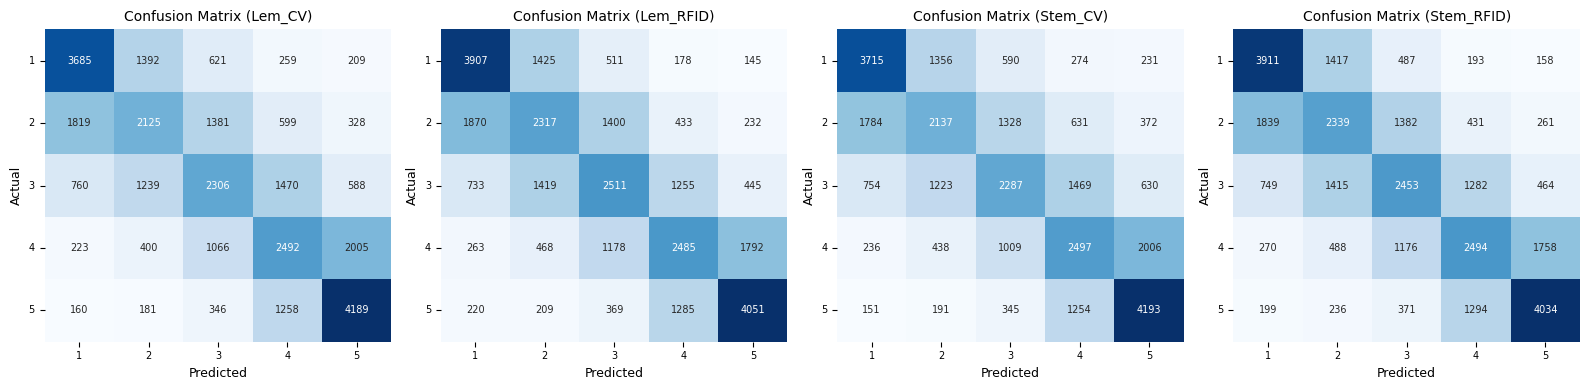

Lem_CV: Train Accuracy - 0.6805, Test Accuracy - 0.4758
Stem_CV: Train Accuracy - 0.6425, Test Accuracy - 0.4768
Lem_TFIDF: Train Accuracy - 0.6068, Test Accuracy - 0.4910
Stem_TFIDF: Train Accuracy - 0.5875, Test Accuracy - 0.4897


In [16]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_logistic_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_logistic_lem_cv, 'Test': accuracy_test_logistic_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_logistic_lem_rfid, 'Test': accuracy_test_logistic_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_logistic_stem_cv, 'Test': accuracy_test_logistic_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_logistic_stem_rfid, 'Test': accuracy_test_logistic_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 2. Support Vector Machine (SVM)

In [17]:
# a) Lemmatized CountVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_lem_CV_train, y_train)
y_pred_train_svm_lem_cv = svm_model.predict(X_lem_CV_train)
y_pred_test_svm_lem_cv = svm_model.predict(X_lem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_cv)
svm_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_cv)
accuracy_train_svm_lem_cv = accuracy_score(y_train, y_pred_train_svm_lem_cv)
accuracy_test_svm_lem_cv = accuracy_score(y_test, y_pred_test_svm_lem_cv)

# Print results
print("SVM - Classification Report: Train Data (lem_cv) - imbalanced:\n", svm_report_train_lem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_cv) - imbalanced:\n", svm_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_svm_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_svm_lem_cv)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.52      0.58      0.86      0.55      0.71      0.49     14568
          2       0.47      0.31      0.91      0.37      0.53      0.26     14482
          3       0.41      0.51      0.82      0.45      0.64      0.40     14371
          4       0.34      0.11      0.95      0.16      0.32      0.09     14548
          5       0.51      0.84      0.80      0.64      0.82      0.68     14600

avg / total       0.45      0.47      0.87      0.43      0.60      0.39     72569


SVM - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.46      0.49      0.86      0.47      0.65      0.40      6166
          2       0.35      0.23      0.89      0.28      0.45      0.19      6252
          3       0.35      0.43      

In [18]:
# b) Lemmatized TFIDFVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_lem_RFID_train, y_train)
y_pred_train_svm_lem_rfid = svm_model.predict(X_lem_RFID_train)
y_pred_test_svm_lem_rfid = svm_model.predict(X_lem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_rfid)
svm_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_rfid)
accuracy_train_svm_lem_rfid = accuracy_score(y_train, y_pred_train_svm_lem_rfid)
accuracy_test_svm_lem_rfid = accuracy_score(y_test, y_pred_test_svm_lem_rfid)

# Print results
print("SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", svm_report_train_lem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", svm_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_svm_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_svm_lem_rfid)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.87      0.93      0.81      0.90      0.80     14568
          2       0.71      0.73      0.93      0.72      0.82      0.66     14482
          3       0.75      0.72      0.94      0.73      0.82      0.66     14371
          4       0.75      0.66      0.94      0.70      0.79      0.61     14548
          5       0.81      0.79      0.95      0.80      0.87      0.74     14600

avg / total       0.76      0.75      0.94      0.75      0.84      0.70     72569


SVM - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.62      0.84      0.55      0.72      0.51      6166
          2       0.35      0.35      0.84      0.35      0.54      0.28      6252
          3       0.39      0.35

In [19]:
# c) Stemmatized CountVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_stem_CV_train, y_train)
y_pred_train_svm_stem_cv = svm_model.predict(X_stem_CV_train)
y_pred_test_svm_stem_cv = svm_model.predict(X_stem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_cv)
svm_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_cv)
accuracy_train_svm_stem_cv = accuracy_score(y_train, y_pred_train_svm_stem_cv)
accuracy_test_svm_stem_cv = accuracy_score(y_test, y_pred_test_svm_stem_cv)

# Print results
print("SVM - Classification Report: Train Data (stem_cv) - imbalanced:\n", svm_report_train_stem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_cv) - imbalanced:\n", svm_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_svm_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_svm_stem_cv)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.48      0.55      0.85      0.51      0.68      0.45     14568
          2       0.44      0.41      0.87      0.43      0.60      0.34     14482
          3       0.48      0.34      0.91      0.40      0.55      0.29     14371
          4       0.35      0.12      0.94      0.18      0.34      0.10     14548
          5       0.46      0.84      0.75      0.59      0.80      0.64     14600

avg / total       0.44      0.45      0.86      0.42      0.59      0.37     72569


SVM - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.43      0.49      0.84      0.46      0.64      0.39      6166
          2       0.36      0.33      0.85      0.34      0.53      0.26      6252
          3       0.40      0.29    

In [20]:
# d) Stemmatized TFIDFVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_stem_RFID_train, y_train)
y_pred_train_svm_stem_rfid = svm_model.predict(X_stem_RFID_train)
y_pred_test_svm_stem_rfid = svm_model.predict(X_stem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_rfid)
svm_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_rfid)
accuracy_train_svm_stem_rfid = accuracy_score(y_train, y_pred_train_svm_stem_rfid)
accuracy_test_svm_stem_rfid = accuracy_score(y_test, y_pred_test_svm_stem_rfid)

# Print results
print("SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", svm_report_train_stem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", svm_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_svm_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_svm_stem_rfid)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.74      0.89      0.92      0.81      0.91      0.82     14568
          2       0.74      0.68      0.94      0.71      0.80      0.62     14482
          3       0.74      0.73      0.94      0.73      0.83      0.67     14371
          4       0.73      0.69      0.93      0.71      0.80      0.63     14548
          5       0.81      0.76      0.96      0.78      0.85      0.71     14600

avg / total       0.75      0.75      0.94      0.75      0.84      0.69     72569


SVM - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.64      0.84      0.56      0.73      0.53      6166
          2       0.36      0.32      0.86      0.34      0.52      0.26      6252
          3       0.38      0.

## Summary - Support Vector Machine

In [21]:
# a) Lemmatized CountVectorized data
svm_report_train_lem_cv_imbalanced_last = [accuracy_train_svm_lem_cv*100] + [float(value) for value in svm_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
svm_report_test_lem_cv_imbalanced_last = [accuracy_test_svm_lem_cv*100] + [float(value) for value in svm_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_cv_imbalanced = pd.DataFrame([svm_report_train_lem_cv_imbalanced_last, svm_report_test_lem_cv_imbalanced_last], columns=column_names)
final_svm_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_svm_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_cv_imbalanced = final_svm_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
svm_report_train_lem_rfid_imbalanced_last = [accuracy_train_svm_lem_rfid*100] + [float(value) for value in svm_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_lem_rfid_imbalanced_last = [accuracy_test_svm_lem_rfid*100] + [float(value) for value in svm_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_rfid_imbalanced = pd.DataFrame([svm_report_train_lem_rfid_imbalanced_last, svm_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_svm_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_svm_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_rfid_imbalanced = final_svm_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
svm_report_train_stem_cv_imbalanced_last = [accuracy_train_svm_stem_cv*100] + [float(value) for value in svm_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_cv_imbalanced_last = [accuracy_test_svm_stem_cv*100] + [float(value) for value in svm_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_cv_imbalanced = pd.DataFrame([svm_report_train_stem_cv_imbalanced_last, svm_report_test_stem_cv_imbalanced_last], columns=column_names)
final_svm_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_svm_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_cv_imbalanced = final_svm_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
svm_report_train_stem_rfid_imbalanced_last = [accuracy_train_svm_stem_rfid*100]+ [float(value) for value in svm_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_rfid_imbalanced_last = [accuracy_test_svm_stem_rfid*100] + [float(value) for value in svm_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_rfid_imbalanced = pd.DataFrame([svm_report_train_stem_rfid_imbalanced_last, svm_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_svm_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_svm_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_rfid_imbalanced = final_svm_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Support Vector Machine (SVM)

In [22]:
final_svm_report = pd.concat([final_svm_report_lem_cv_imbalanced,
                    final_svm_report_lem_rfid_imbalanced,
                    final_svm_report_stem_cv_imbalanced,
                    final_svm_report_stem_rfid_imbalanced])

final_svm_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,47.047637,0.45,0.47,0.87,0.43,0.60,0.39,72569.0
Lemmatized Count Vectorized,Test,40.654641,0.38,0.41,0.85,0.37,0.55,0.32,31101.0
Lemmatized TFIDF Vectorized,Train,75.486778,0.76,0.75,0.94,0.75,0.84,0.70,72569.0
Lemmatized TFIDF Vectorized,Test,45.538729,0.45,0.46,0.86,0.45,0.62,0.38,31101.0
Stemmatized Count Vectorized,Train,45.424355,0.44,0.45,0.86,0.42,0.59,0.37,72569.0
Stemmatized Count Vectorized,Test,40.127327,0.38,0.40,0.85,0.37,0.55,0.32,31101.0
Stemmatized TFIDF Vectorized,Train,74.957627,0.75,0.75,0.94,0.75,0.84,0.69,72569.0
Stemmatized TFIDF Vectorized,Test,45.619112,0.45,0.46,0.86,0.45,0.62,0.38,31101.0


### Confusion Matrix for Support Vector Machine (SVM)

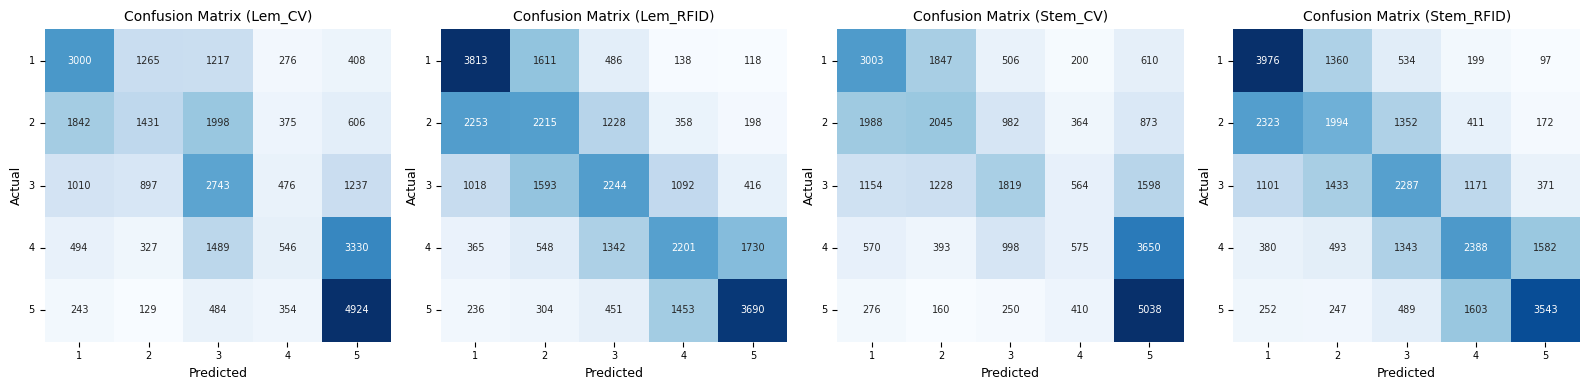

Lem_TFIDF: Train Accuracy - 0.7549, Test Accuracy - 0.4554
Stem_TFIDF: Train Accuracy - 0.7496, Test Accuracy - 0.4562
Lem_CV: Train Accuracy - 0.4705, Test Accuracy - 0.4065
Stem_CV: Train Accuracy - 0.4542, Test Accuracy - 0.4013


In [23]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_svm_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_svm_lem_cv, 'Test': accuracy_test_svm_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_svm_lem_rfid, 'Test': accuracy_test_svm_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_svm_stem_cv, 'Test': accuracy_test_svm_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_svm_stem_rfid, 'Test': accuracy_test_svm_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 3. k-Nearest Neighbors (kNN)

In [24]:
# a) KNN on Lemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_CV_train, y_train)

y_pred_train_knn_lem_cv = knn_model.predict(X_lem_CV_train)
y_pred_test_knn_lem_cv = knn_model.predict(X_lem_CV_test)

knn_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_cv)
knn_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_cv)

accuracy_train_knn_lem_cv = accuracy_score(y_train, y_pred_train_knn_lem_cv)
accuracy_test_knn_lem_cv = accuracy_score(y_test, y_pred_test_knn_lem_cv)

print("KNN - Classification Report: Train Data (lem_cv) - imbalanced:\n", knn_report_train_lem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_cv) - imbalanced:\n", knn_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_knn_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_knn_lem_cv)

KNN - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.58      0.66      0.88      0.62      0.76      0.57     14568
          2       0.58      0.49      0.91      0.53      0.67      0.43     14482
          3       0.56      0.45      0.91      0.50      0.64      0.39     14371
          4       0.49      0.52      0.86      0.51      0.67      0.44     14548
          5       0.57      0.65      0.88      0.61      0.75      0.55     14600

avg / total       0.56      0.55      0.89      0.55      0.70      0.48     72569


KNN - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.45      0.84      0.43      0.61      0.36      6166
          2       0.33      0.25      0.87      0.29      0.47      0.20      6252
          3       0.33      0.25      

In [25]:
# b) KNN on Lemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_RFID_train, y_train)

y_pred_train_knn_lem_rfid = knn_model.predict(X_lem_RFID_train)
y_pred_test_knn_lem_rfid = knn_model.predict(X_lem_RFID_test)

knn_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_rfid)
knn_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_rfid)

accuracy_train_knn_lem_rfid = accuracy_score(y_train, y_pred_train_knn_lem_rfid)
accuracy_test_knn_lem_rfid = accuracy_score(y_test, y_pred_test_knn_lem_rfid)

print("KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", knn_report_train_lem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", knn_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_knn_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_knn_lem_rfid)

KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.34      0.96      0.45      0.57      0.30     14568
          2       0.62      0.43      0.94      0.51      0.63      0.38     14482
          3       0.46      0.59      0.83      0.52      0.70      0.48     14371
          4       0.47      0.49      0.86      0.48      0.65      0.41     14548
          5       0.44      0.67      0.79      0.53      0.73      0.52     14600

avg / total       0.53      0.50      0.88      0.50      0.65      0.42     72569


KNN - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.40      0.14      0.95      0.21      0.37      0.12      6166
          2       0.28      0.15      0.91      0.19      0.37      0.12      6252
          3       0.26      0.33

In [26]:
# c) KNN on Stemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_CV_train, y_train)

y_pred_train_knn_stem_cv = knn_model.predict(X_stem_CV_train)
y_pred_test_knn_stem_cv = knn_model.predict(X_stem_CV_test)

knn_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_cv)
knn_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_cv)

accuracy_train_knn_stem_cv = accuracy_score(y_train, y_pred_train_knn_stem_cv)
accuracy_test_knn_stem_cv = accuracy_score(y_test, y_pred_test_knn_stem_cv)

print("KNN - Classification Report: Train Data (stem_cv) - imbalanced:\n", knn_report_train_stem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_cv) - imbalanced:\n", knn_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_knn_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_knn_stem_cv)

KNN - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.58      0.68      0.88      0.62      0.77      0.58     14568
          2       0.59      0.49      0.91      0.53      0.67      0.43     14482
          3       0.59      0.44      0.92      0.50      0.64      0.39     14371
          4       0.49      0.53      0.86      0.51      0.67      0.44     14548
          5       0.57      0.67      0.87      0.62      0.76      0.57     14600

avg / total       0.56      0.56      0.89      0.56      0.70      0.48     72569


KNN - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.40      0.45      0.84      0.43      0.61      0.36      6166
          2       0.33      0.25      0.87      0.28      0.46      0.20      6252
          3       0.33      0.23    

In [27]:
# d) KNN on Stemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_RFID_train, y_train)

y_pred_train_knn_stem_rfid = knn_model.predict(X_stem_RFID_train)
y_pred_test_knn_stem_rfid = knn_model.predict(X_stem_RFID_test)

knn_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_rfid)
knn_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_rfid)

accuracy_train_knn_stem_rfid = accuracy_score(y_train, y_pred_train_knn_stem_rfid)
accuracy_test_knn_stem_rfid = accuracy_score(y_test, y_pred_test_knn_stem_rfid)

print("KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", knn_report_train_stem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", knn_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_knn_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_knn_stem_rfid)

KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.38      0.95      0.47      0.60      0.34     14568
          2       0.62      0.42      0.94      0.50      0.63      0.37     14482
          3       0.47      0.57      0.84      0.52      0.69      0.47     14371
          4       0.46      0.50      0.86      0.48      0.65      0.41     14548
          5       0.45      0.65      0.80      0.53      0.72      0.51     14600

avg / total       0.53      0.50      0.88      0.50      0.66      0.42     72569


KNN - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.37      0.17      0.93      0.23      0.39      0.14      6166
          2       0.29      0.16      0.90      0.20      0.38      0.13      6252
          3       0.26      0.

## Summary - k-Nearest Neighbors

In [28]:
# a) Lemmatized CountVectorized data
knn_report_train_lem_cv_imbalanced_last = [accuracy_train_knn_lem_cv*100] + [float(value) for value in knn_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
knn_report_test_lem_cv_imbalanced_last = [accuracy_test_knn_lem_cv*100] + [float(value) for value in knn_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_cv_imbalanced = pd.DataFrame([knn_report_train_lem_cv_imbalanced_last, knn_report_test_lem_cv_imbalanced_last], columns=column_names)
final_knn_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_knn_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_cv_imbalanced = final_knn_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
knn_report_train_lem_rfid_imbalanced_last = [accuracy_train_knn_lem_rfid*100] + [float(value) for value in knn_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_lem_rfid_imbalanced_last = [accuracy_test_knn_lem_rfid*100] + [float(value) for value in knn_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_rfid_imbalanced = pd.DataFrame([knn_report_train_lem_rfid_imbalanced_last, knn_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_knn_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_knn_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_rfid_imbalanced = final_knn_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
knn_report_train_stem_cv_imbalanced_last = [accuracy_train_knn_stem_cv*100] + [float(value) for value in knn_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_cv_imbalanced_last = [accuracy_test_knn_stem_cv*100] + [float(value) for value in knn_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_cv_imbalanced = pd.DataFrame([knn_report_train_stem_cv_imbalanced_last, knn_report_test_stem_cv_imbalanced_last], columns=column_names)
final_knn_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_knn_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_cv_imbalanced = final_knn_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
knn_report_train_stem_rfid_imbalanced_last = [accuracy_train_knn_stem_rfid*100]+ [float(value) for value in knn_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_rfid_imbalanced_last = [accuracy_test_knn_stem_rfid*100] + [float(value) for value in knn_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_rfid_imbalanced = pd.DataFrame([knn_report_train_stem_rfid_imbalanced_last, knn_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_knn_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_knn_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_rfid_imbalanced = final_knn_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for k-Nearest Neighbors (kNN)

In [29]:
final_knn_report = pd.concat([final_knn_report_lem_cv_imbalanced,
                    final_knn_report_lem_rfid_imbalanced,
                    final_knn_report_stem_cv_imbalanced,
                    final_knn_report_stem_rfid_imbalanced])

final_knn_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,55.435517,0.56,0.55,0.89,0.55,0.70,0.48,72569.0
Lemmatized Count Vectorized,Test,36.339668,0.36,0.36,0.84,0.36,0.55,0.29,31101.0
Lemmatized TFIDF Vectorized,Train,50.142623,0.53,0.50,0.88,0.50,0.65,0.42,72569.0
Lemmatized TFIDF Vectorized,Test,28.564998,0.30,0.29,0.82,0.27,0.46,0.21,31101.0
Stemmatized Count Vectorized,Train,55.986716,0.56,0.56,0.89,0.56,0.70,0.48,72569.0
Stemmatized Count Vectorized,Test,36.346098,0.36,0.36,0.84,0.35,0.54,0.29,31101.0
Stemmatized TFIDF Vectorized,Train,50.363103,0.53,0.50,0.88,0.50,0.66,0.42,72569.0
Stemmatized TFIDF Vectorized,Test,28.802932,0.30,0.29,0.82,0.28,0.47,0.22,31101.0


### Confusion Matrix for k-Nearest Neighbors (kNN)

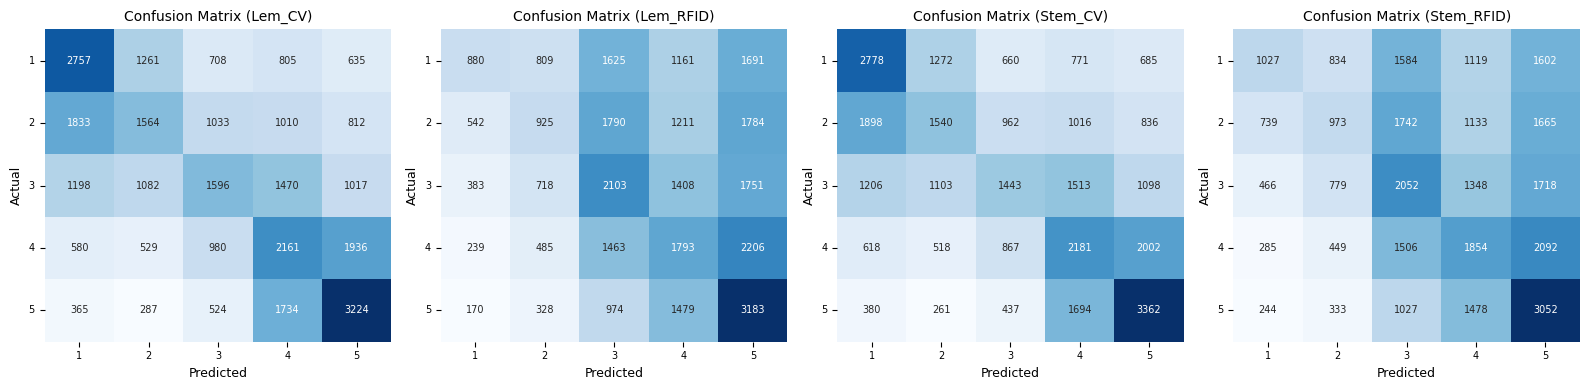

Stem_CV: Train Accuracy - 0.5599, Test Accuracy - 0.3635
Lem_CV: Train Accuracy - 0.5544, Test Accuracy - 0.3634
Stem_TFIDF: Train Accuracy - 0.5036, Test Accuracy - 0.2880
Lem_TFIDF: Train Accuracy - 0.5014, Test Accuracy - 0.2856


In [30]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_knn_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_knn_lem_cv, 'Test': accuracy_test_knn_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_knn_lem_rfid, 'Test': accuracy_test_knn_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_knn_stem_cv, 'Test': accuracy_test_knn_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_knn_stem_rfid, 'Test': accuracy_test_knn_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 4. Decision Tree Classifier

In [31]:
# a) Decision Tree on Lemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_CV_train, y_train)
y_pred_train_dt_lem_cv = dt_model.predict(X_lem_CV_train)
y_pred_test_dt_lem_cv = dt_model.predict(X_lem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_cv)
dt_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_cv)
accuracy_train_dt_lem_cv = accuracy_score(y_train, y_pred_train_dt_lem_cv)
accuracy_test_dt_lem_cv = accuracy_score(y_test, y_pred_test_dt_lem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_cv):\n", dt_report_train_lem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_cv):\n", dt_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_dt_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_dt_lem_cv)

Decision Tree - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      0.99      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.94      0.98      0.93      0.96      0.92     14548
          5       0.94      0.94      0.99      0.94      0.96      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.98      0.95     72569


Decision Tree - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.46      0.46      0.87      0.46      0.63      0.38      6166
          2       0.33      0.31      0.84      0.32      0.51      0.25      6252
          3       0.34      0.31      0.84  

In [32]:
# b) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_RFID_train, y_train)
y_pred_train_dt_lem_rfid = dt_model.predict(X_lem_RFID_train)
y_pred_test_dt_lem_rfid = dt_model.predict(X_lem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_rfid)
dt_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_rfid)
accuracy_train_dt_lem_rfid = accuracy_score(y_train, y_pred_train_dt_lem_rfid)
accuracy_test_dt_lem_rfid = accuracy_score(y_test, y_pred_test_dt_lem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_tfidf):\n", dt_report_train_lem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_tfidf):\n", dt_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_dt_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_dt_lem_rfid)

Decision Tree - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      0.99      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.94      0.98      0.93      0.96      0.92     14548
          5       0.94      0.94      0.99      0.94      0.96      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.98      0.95     72569


Decision Tree - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.46      0.48      0.86      0.47      0.64      0.39      6166
          2       0.33      0.32      0.84      0.33      0.52      0.26      6252
          3       0.33      0.30      

In [33]:
# c) Decision Tree on Stemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_CV_train, y_train)
y_pred_train_dt_stem_cv = dt_model.predict(X_stem_CV_train)
y_pred_test_dt_stem_cv = dt_model.predict(X_stem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_cv)
dt_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_cv)
accuracy_train_dt_stem_cv = accuracy_score(y_train, y_pred_train_dt_stem_cv)
accuracy_test_dt_stem_cv = accuracy_score(y_test, y_pred_test_dt_stem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_cv):\n", dt_report_train_stem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_cv):\n", dt_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_dt_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_dt_stem_cv)

Decision Tree - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      0.99      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.94      0.98      0.93      0.96      0.91     14548
          5       0.93      0.94      0.98      0.94      0.96      0.92     14600

avg / total       0.96      0.96      0.99      0.96      0.97      0.95     72569


Decision Tree - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.45      0.45      0.87      0.45      0.63      0.38      6166
          2       0.33      0.31      0.84      0.32      0.51      0.25      6252
          3       0.33      0.30      0.84

In [34]:
# d) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_RFID_train, y_train)
y_pred_train_dt_stem_rfid = dt_model.predict(X_stem_RFID_train)
y_pred_test_dt_stem_rfid = dt_model.predict(X_stem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_rfid)
dt_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_rfid)
accuracy_train_dt_stem_rfid = accuracy_score(y_train, y_pred_train_dt_stem_rfid)
accuracy_test_dt_stem_rfid = accuracy_score(y_test, y_pred_test_dt_stem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_tfidf):\n", dt_report_train_stem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_tfidf):\n", dt_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_dt_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_dt_stem_rfid)

Decision Tree - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      0.99      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.94      0.98      0.93      0.96      0.91     14548
          5       0.93      0.94      0.98      0.94      0.96      0.92     14600

avg / total       0.96      0.96      0.99      0.96      0.97      0.95     72569


Decision Tree - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.45      0.47      0.86      0.46      0.63      0.39      6166
          2       0.32      0.32      0.83      0.32      0.51      0.25      6252
          3       0.33      0.31    

## Summary - Decision Tree

In [35]:
# a) Lemmatized CountVectorized data
dt_report_train_lem_cv_imbalanced_last = [accuracy_train_dt_lem_cv*100] + [float(value) for value in dt_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
dt_report_test_lem_cv_imbalanced_last = [accuracy_test_dt_lem_cv*100] + [float(value) for value in dt_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_cv_imbalanced = pd.DataFrame([dt_report_train_lem_cv_imbalanced_last, dt_report_test_lem_cv_imbalanced_last], columns=column_names)
final_dt_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_dt_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_cv_imbalanced = final_dt_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
dt_report_train_lem_rfid_imbalanced_last = [accuracy_train_dt_lem_rfid*100] + [float(value) for value in dt_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_lem_rfid_imbalanced_last = [accuracy_test_dt_lem_rfid*100] + [float(value) for value in dt_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_rfid_imbalanced = pd.DataFrame([dt_report_train_lem_rfid_imbalanced_last, dt_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_dt_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_dt_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_rfid_imbalanced = final_dt_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
dt_report_train_stem_cv_imbalanced_last = [accuracy_train_dt_stem_cv*100] + [float(value) for value in dt_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_cv_imbalanced_last = [accuracy_test_dt_stem_cv*100] + [float(value) for value in dt_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_cv_imbalanced = pd.DataFrame([dt_report_train_stem_cv_imbalanced_last, dt_report_test_stem_cv_imbalanced_last], columns=column_names)
final_dt_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_dt_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_cv_imbalanced = final_dt_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
dt_report_train_stem_rfid_imbalanced_last = [accuracy_train_dt_stem_rfid*100]+ [float(value) for value in dt_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_rfid_imbalanced_last = [accuracy_test_dt_stem_rfid*100] + [float(value) for value in dt_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_rfid_imbalanced = pd.DataFrame([dt_report_train_stem_rfid_imbalanced_last, dt_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_dt_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_dt_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_rfid_imbalanced = final_dt_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Decision Tree

In [36]:
final_dt_report = pd.concat([final_dt_report_lem_cv_imbalanced,
                    final_dt_report_lem_rfid_imbalanced,
                    final_dt_report_stem_cv_imbalanced,
                    final_dt_report_stem_rfid_imbalanced])

final_dt_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,96.235307,0.96,0.96,0.99,0.96,0.98,0.95,72569.0
Lemmatized Count Vectorized,Test,38.844410,0.39,0.39,0.85,0.39,0.57,0.32,31101.0
Lemmatized TFIDF Vectorized,Train,96.231173,0.96,0.96,0.99,0.96,0.98,0.95,72569.0
Lemmatized TFIDF Vectorized,Test,39.075914,0.39,0.39,0.85,0.39,0.57,0.32,31101.0
Stemmatized Count Vectorized,Train,96.006559,0.96,0.96,0.99,0.96,0.97,0.95,72569.0
Stemmatized Count Vectorized,Test,38.754381,0.39,0.39,0.85,0.39,0.57,0.31,31101.0
Stemmatized TFIDF Vectorized,Train,96.002425,0.96,0.96,0.99,0.96,0.97,0.95,72569.0
Stemmatized TFIDF Vectorized,Test,38.976239,0.39,0.39,0.85,0.39,0.57,0.32,31101.0


### Confusion Matrix for Decision Tree

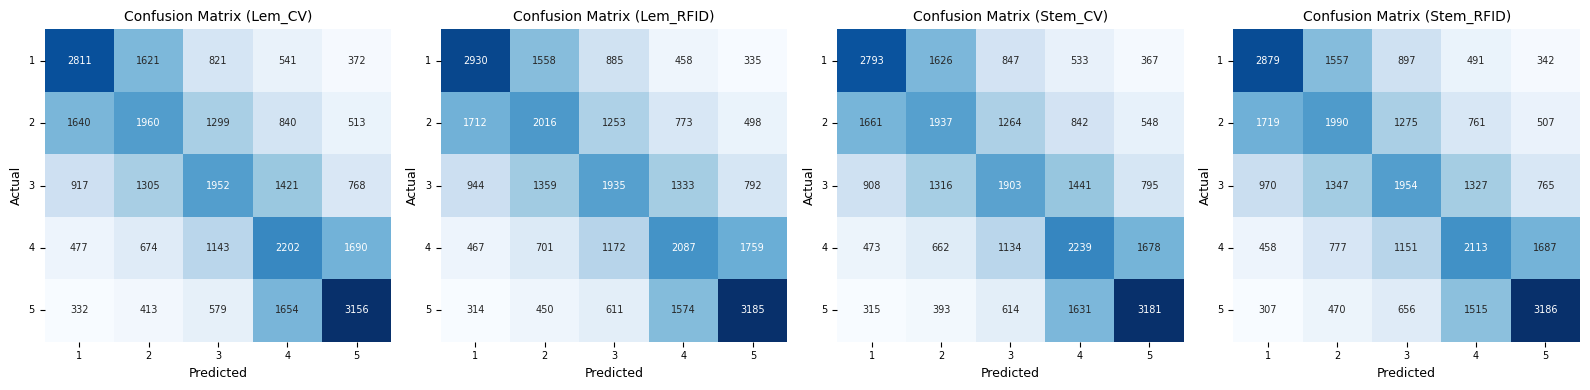

Lem_CV: Train Accuracy - 0.9624, Test Accuracy - 0.3884
Lem_TFIDF: Train Accuracy - 0.9623, Test Accuracy - 0.3908
Stem_CV: Train Accuracy - 0.9601, Test Accuracy - 0.3875
Stem_TFIDF: Train Accuracy - 0.9600, Test Accuracy - 0.3898


In [37]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_dt_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_dt_lem_cv, 'Test': accuracy_test_dt_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_dt_lem_rfid, 'Test': accuracy_test_dt_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_dt_stem_cv, 'Test': accuracy_test_dt_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_dt_stem_rfid, 'Test': accuracy_test_dt_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 5. Random Forest Classifier

In [38]:
# a) Random Forest on Lemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_CV_train, y_train)
y_pred_train_rf_lem_cv = rf_model.predict(X_lem_CV_train)
y_pred_test_rf_lem_cv = rf_model.predict(X_lem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_cv)
rf_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_cv)
accuracy_train_rf_lem_cv = accuracy_score(y_train, y_pred_train_rf_lem_cv)
accuracy_test_rf_lem_cv = accuracy_score(y_test, y_pred_test_rf_lem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train_lem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf_lem_cv)


Random Forest - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      1.00      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.93      0.93      0.98      0.93      0.96      0.91     14548
          5       0.93      0.95      0.98      0.94      0.97      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.98      0.95     72569


Random Forest - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.66      0.84      0.57      0.74      0.54      6166
          2       0.38      0.33      0.86      0.35      0.53      0.27      6252
          3       0.43      0.34      0.88  

In [39]:
# b) Random Forest on Lemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_RFID_train, y_train)
y_pred_train_rf_lem_rfid = rf_model.predict(X_lem_RFID_train)
y_pred_test_rf_lem_rfid = rf_model.predict(X_lem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_rfid)
rf_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_rfid)
accuracy_train_rf_lem_rfid = accuracy_score(y_train, y_pred_train_rf_lem_rfid)
accuracy_test_rf_lem_rfid = accuracy_score(y_test, y_pred_test_rf_lem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (lem_tfidf):\n", rf_report_train_lem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_tfidf):\n", rf_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_rf_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_rf_lem_rfid)

Random Forest - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      1.00      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.93      0.94      0.98      0.93      0.96      0.91     14548
          5       0.93      0.95      0.98      0.94      0.97      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.98      0.95     72569


Random Forest - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.68      0.83      0.58      0.75      0.56      6166
          2       0.38      0.35      0.85      0.36      0.55      0.29      6252
          3       0.42      0.36      

In [40]:
# c) Random Forest on Stemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_CV_train, y_train)
y_pred_train_rf_stem_cv = rf_model.predict(X_stem_CV_train)
y_pred_test_rf_stem_cv = rf_model.predict(X_stem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_cv)
rf_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_cv)
accuracy_train_rf_stem_cv = accuracy_score(y_train, y_pred_train_rf_stem_cv)
accuracy_test_rf_stem_cv = accuracy_score(y_test, y_pred_test_rf_stem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (stem_cv):\n", rf_report_train_stem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_cv):\n", rf_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_rf_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_rf_stem_cv)

Random Forest - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.99      1.00      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.93      0.98      0.93      0.96      0.91     14548
          5       0.93      0.95      0.98      0.94      0.97      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.97      0.95     72569


Random Forest - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.66      0.84      0.57      0.75      0.55      6166
          2       0.38      0.33      0.86      0.35      0.54      0.27      6252
          3       0.43      0.34      0.88

In [41]:
# d) Random Forest on Stemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_RFID_train, y_train)
y_pred_train_rf_stem_rfid = rf_model.predict(X_stem_RFID_train)
y_pred_test_rf_stem_rfid = rf_model.predict(X_stem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_rfid)
rf_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_rfid)
accuracy_train_rf_stem_rfid = accuracy_score(y_train, y_pred_train_rf_stem_rfid)
accuracy_test_rf_stem_rfid = accuracy_score(y_test, y_pred_test_rf_stem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (stem_tfidf):\n", rf_report_train_stem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_tfidf):\n", rf_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_rf_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_rf_stem_rfid)

Random Forest - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.98      1.00      0.98      0.99      0.98     14568
          2       0.99      0.98      1.00      0.98      0.99      0.97     14482
          3       0.98      0.96      1.00      0.97      0.98      0.95     14371
          4       0.92      0.93      0.98      0.93      0.96      0.91     14548
          5       0.93      0.95      0.98      0.94      0.97      0.93     14600

avg / total       0.96      0.96      0.99      0.96      0.97      0.95     72569


Random Forest - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.49      0.68      0.83      0.57      0.75      0.56      6166
          2       0.37      0.34      0.85      0.36      0.54      0.28      6252
          3       0.42      0.35    

## Summary - Random Forest

In [42]:
# a) Lemmatized CountVectorized data
rf_report_train_lem_cv_imbalanced_last = [accuracy_train_rf_lem_cv*100] + [float(value) for value in rf_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
rf_report_test_lem_cv_imbalanced_last = [accuracy_test_rf_lem_cv*100] + [float(value) for value in rf_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_cv_imbalanced = pd.DataFrame([rf_report_train_lem_cv_imbalanced_last, rf_report_test_lem_cv_imbalanced_last], columns=column_names)
final_rf_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_rf_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_cv_imbalanced = final_rf_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
rf_report_train_lem_rfid_imbalanced_last = [accuracy_train_rf_lem_rfid*100] + [float(value) for value in rf_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_lem_rfid_imbalanced_last = [accuracy_test_rf_lem_rfid*100] + [float(value) for value in rf_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_rfid_imbalanced = pd.DataFrame([rf_report_train_lem_rfid_imbalanced_last, rf_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_rf_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_rf_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_rfid_imbalanced = final_rf_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
rf_report_train_stem_cv_imbalanced_last = [accuracy_train_rf_stem_cv*100] + [float(value) for value in rf_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_cv_imbalanced_last = [accuracy_test_rf_stem_cv*100] + [float(value) for value in rf_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_cv_imbalanced = pd.DataFrame([rf_report_train_stem_cv_imbalanced_last, rf_report_test_stem_cv_imbalanced_last], columns=column_names)
final_rf_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_rf_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_cv_imbalanced = final_rf_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
rf_report_train_stem_rfid_imbalanced_last = [accuracy_train_rf_stem_rfid*100]+ [float(value) for value in rf_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_rfid_imbalanced_last = [accuracy_test_rf_stem_rfid*100] + [float(value) for value in rf_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_rfid_imbalanced = pd.DataFrame([rf_report_train_stem_rfid_imbalanced_last, rf_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_rf_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_rf_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_rfid_imbalanced = final_rf_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Random Forest

In [43]:
final_rf_report = pd.concat([final_rf_report_lem_cv_imbalanced,
                    final_rf_report_lem_rfid_imbalanced,
                    final_rf_report_stem_cv_imbalanced,
                    final_rf_report_stem_rfid_imbalanced])

final_rf_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,96.235307,0.96,0.96,0.99,0.96,0.98,0.95,72569.0
Lemmatized Count Vectorized,Test,46.873091,0.46,0.47,0.87,0.46,0.63,0.39,31101.0
Lemmatized TFIDF Vectorized,Train,96.231173,0.96,0.96,0.99,0.96,0.98,0.95,72569.0
Lemmatized TFIDF Vectorized,Test,47.082087,0.46,0.47,0.87,0.46,0.63,0.39,31101.0
Stemmatized Count Vectorized,Train,96.006559,0.96,0.96,0.99,0.96,0.97,0.95,72569.0
Stemmatized Count Vectorized,Test,46.702678,0.46,0.47,0.87,0.46,0.63,0.39,31101.0
Stemmatized TFIDF Vectorized,Train,96.002425,0.96,0.96,0.99,0.96,0.97,0.95,72569.0
Stemmatized TFIDF Vectorized,Test,46.892383,0.46,0.47,0.87,0.46,0.63,0.39,31101.0


### Confusion Matrix for Random Forest

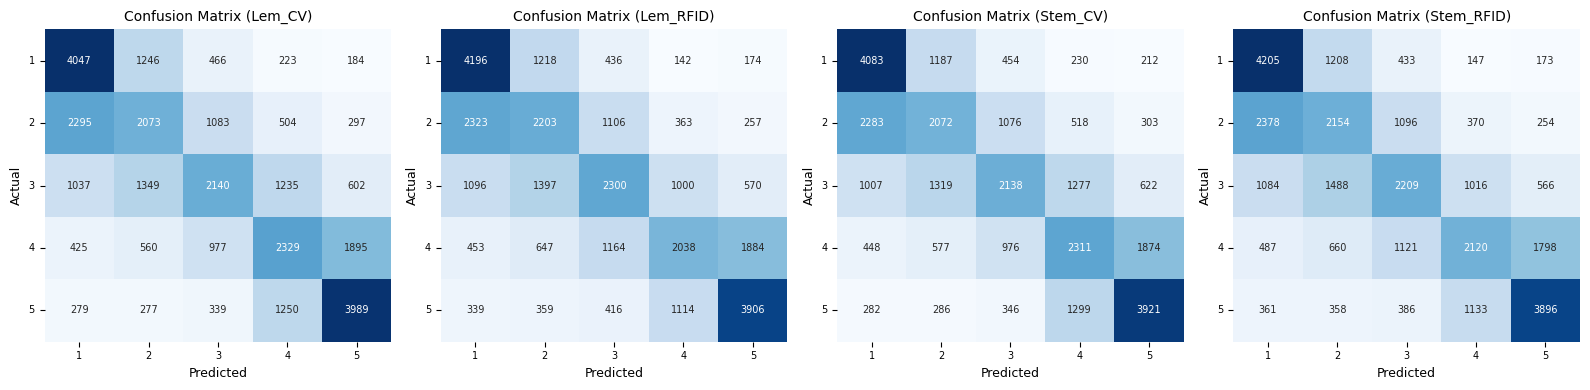

Lem_CV: Train Accuracy - 0.9624, Test Accuracy - 0.4687
Lem_TFIDF: Train Accuracy - 0.9623, Test Accuracy - 0.4708
Stem_CV: Train Accuracy - 0.9601, Test Accuracy - 0.4670
Stem_TFIDF: Train Accuracy - 0.9600, Test Accuracy - 0.4689


In [44]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_rf_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_rf_lem_cv, 'Test': accuracy_test_rf_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_rf_lem_rfid, 'Test': accuracy_test_rf_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_rf_stem_cv, 'Test': accuracy_test_rf_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_rf_stem_rfid, 'Test': accuracy_test_rf_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 6. Naive Bayes

In [45]:
# a) Naive Bayes on Lemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_CV_train, y_train)
y_pred_train_nb_lem_cv = nb_model.predict(X_lem_CV_train)
y_pred_test_nb_lem_cv = nb_model.predict(X_lem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_cv)
nb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_cv)
accuracy_train_nb_lem_cv = accuracy_score(y_train, y_pred_train_nb_lem_cv)
accuracy_test_nb_lem_cv = accuracy_score(y_test, y_pred_test_nb_lem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_cv):\n", nb_report_train_lem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_cv):\n", nb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_nb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_nb_lem_cv)

Naive Bayes - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.60      0.67      0.89      0.63      0.77      0.58     14568
          2       0.52      0.45      0.90      0.48      0.63      0.38     14482
          3       0.53      0.43      0.90      0.48      0.63      0.37     14371
          4       0.51      0.43      0.90      0.47      0.62      0.37     14548
          5       0.57      0.77      0.86      0.66      0.81      0.65     14600

avg / total       0.55      0.55      0.89      0.54      0.69      0.47     72569


Naive Bayes - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.53      0.61      0.87      0.57      0.73      0.51      6166
          2       0.38      0.33      0.86      0.35      0.53      0.27      6252
          3       0.40      0.33      0.88      

In [46]:
# b) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_RFID_train, y_train)
y_pred_train_nb_lem_rfid = nb_model.predict(X_lem_RFID_train)
y_pred_test_nb_lem_rfid = nb_model.predict(X_lem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_rfid)
nb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_rfid)
accuracy_train_nb_lem_rfid = accuracy_score(y_train, y_pred_train_nb_lem_rfid)
accuracy_test_nb_lem_rfid = accuracy_score(y_test, y_pred_test_nb_lem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_tfidf):\n", nb_report_train_lem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_tfidf):\n", nb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_nb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_nb_lem_rfid)

Naive Bayes - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.60      0.72      0.88      0.65      0.79      0.62     14568
          2       0.50      0.52      0.87      0.51      0.68      0.44     14482
          3       0.53      0.49      0.89      0.51      0.66      0.42     14371
          4       0.56      0.42      0.92      0.48      0.62      0.37     14548
          5       0.63      0.67      0.90      0.65      0.78      0.59     14600

avg / total       0.56      0.57      0.89      0.56      0.71      0.49     72569


Naive Bayes - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.52      0.64      0.86      0.57      0.74      0.53      6166
          2       0.36      0.38      0.83      0.37      0.56      0.30      6252
          3       0.41      0.38      0.86

In [47]:
# c) Naive Bayes on Stemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_CV_train, y_train)
y_pred_train_nb_stem_cv = nb_model.predict(X_stem_CV_train)
y_pred_test_nb_stem_cv = nb_model.predict(X_stem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_cv)
nb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_cv)
accuracy_train_nb_stem_cv = accuracy_score(y_train, y_pred_train_nb_stem_cv)
accuracy_test_nb_stem_cv = accuracy_score(y_test, y_pred_test_nb_stem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_cv):\n", nb_report_train_stem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_cv):\n", nb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_nb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_nb_stem_cv)

Naive Bayes - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.59      0.65      0.88      0.62      0.76      0.57     14568
          2       0.49      0.42      0.89      0.46      0.62      0.36     14482
          3       0.50      0.41      0.90      0.45      0.60      0.35     14371
          4       0.49      0.41      0.89      0.45      0.61      0.35     14548
          5       0.56      0.76      0.85      0.64      0.80      0.64     14600

avg / total       0.53      0.53      0.88      0.52      0.68      0.45     72569


Naive Bayes - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.53      0.60      0.87      0.56      0.72      0.51      6166
          2       0.38      0.33      0.87      0.35      0.53      0.27      6252
          3       0.40      0.33      0.88    

In [48]:
# d) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_RFID_train, y_train)
y_pred_train_nb_stem_rfid = nb_model.predict(X_stem_RFID_train)
y_pred_test_nb_stem_rfid = nb_model.predict(X_stem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_rfid)
nb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_rfid)
accuracy_train_nb_stem_rfid = accuracy_score(y_train, y_pred_train_nb_stem_rfid)
accuracy_test_nb_stem_rfid = accuracy_score(y_test, y_pred_test_nb_stem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_tfidf):\n", nb_report_train_stem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_tfidf):\n", nb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_nb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_nb_stem_rfid)

Naive Bayes - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.58      0.70      0.87      0.64      0.78      0.60     14568
          2       0.47      0.50      0.86      0.49      0.66      0.42     14482
          3       0.51      0.47      0.89      0.49      0.65      0.40     14371
          4       0.54      0.41      0.91      0.46      0.61      0.35     14548
          5       0.62      0.66      0.90      0.64      0.77      0.58     14600

avg / total       0.54      0.55      0.89      0.54      0.69      0.47     72569


Naive Bayes - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.52      0.63      0.86      0.57      0.74      0.53      6166
          2       0.36      0.38      0.83      0.37      0.56      0.30      6252
          3       0.40      0.37      0.

## Summary - Naive Bayes

In [49]:
# a) Lemmatized CountVectorized data
nb_report_train_lem_cv_imbalanced_last = [accuracy_train_nb_lem_cv*100] + [float(value) for value in nb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
nb_report_test_lem_cv_imbalanced_last = [accuracy_test_nb_lem_cv*100] + [float(value) for value in nb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_cv_imbalanced = pd.DataFrame([nb_report_train_lem_cv_imbalanced_last, nb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_nb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_nb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_cv_imbalanced = final_nb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
nb_report_train_lem_rfid_imbalanced_last = [accuracy_train_nb_lem_rfid*100] + [float(value) for value in nb_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_lem_rfid_imbalanced_last = [accuracy_test_nb_lem_rfid*100] + [float(value) for value in nb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_rfid_imbalanced = pd.DataFrame([nb_report_train_lem_rfid_imbalanced_last, nb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_nb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_nb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_rfid_imbalanced = final_nb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
nb_report_train_stem_cv_imbalanced_last = [accuracy_train_nb_stem_cv*100] + [float(value) for value in nb_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_cv_imbalanced_last = [accuracy_test_nb_stem_cv*100] + [float(value) for value in nb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_cv_imbalanced = pd.DataFrame([nb_report_train_stem_cv_imbalanced_last, nb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_nb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_nb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_cv_imbalanced = final_nb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
nb_report_train_stem_rfid_imbalanced_last = [accuracy_train_nb_stem_rfid*100]+ [float(value) for value in nb_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_rfid_imbalanced_last = [accuracy_test_nb_stem_rfid*100] + [float(value) for value in nb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_rfid_imbalanced = pd.DataFrame([nb_report_train_stem_rfid_imbalanced_last, nb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_nb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_nb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_rfid_imbalanced = final_nb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Naive Bayes

In [50]:
final_nb_report = pd.concat([final_nb_report_lem_cv_imbalanced,
                    final_nb_report_lem_rfid_imbalanced,
                    final_nb_report_stem_cv_imbalanced,
                    final_nb_report_stem_rfid_imbalanced])

final_nb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,55.068969,0.55,0.55,0.89,0.54,0.69,0.47,72569.0
Lemmatized Count Vectorized,Test,46.390791,0.45,0.46,0.87,0.45,0.62,0.39,31101.0
Lemmatized TFIDF Vectorized,Train,56.547562,0.56,0.57,0.89,0.56,0.71,0.49,72569.0
Lemmatized TFIDF Vectorized,Test,46.795923,0.46,0.47,0.87,0.46,0.63,0.39,31101.0
Stemmatized Count Vectorized,Train,53.190756,0.53,0.53,0.88,0.52,0.68,0.45,72569.0
Stemmatized Count Vectorized,Test,46.117488,0.45,0.46,0.87,0.45,0.62,0.38,31101.0
Stemmatized TFIDF Vectorized,Train,54.716201,0.54,0.55,0.89,0.54,0.69,0.47,72569.0
Stemmatized TFIDF Vectorized,Test,46.217163,0.46,0.46,0.87,0.46,0.63,0.39,31101.0


### Confusion Matrix for Naive Bayes

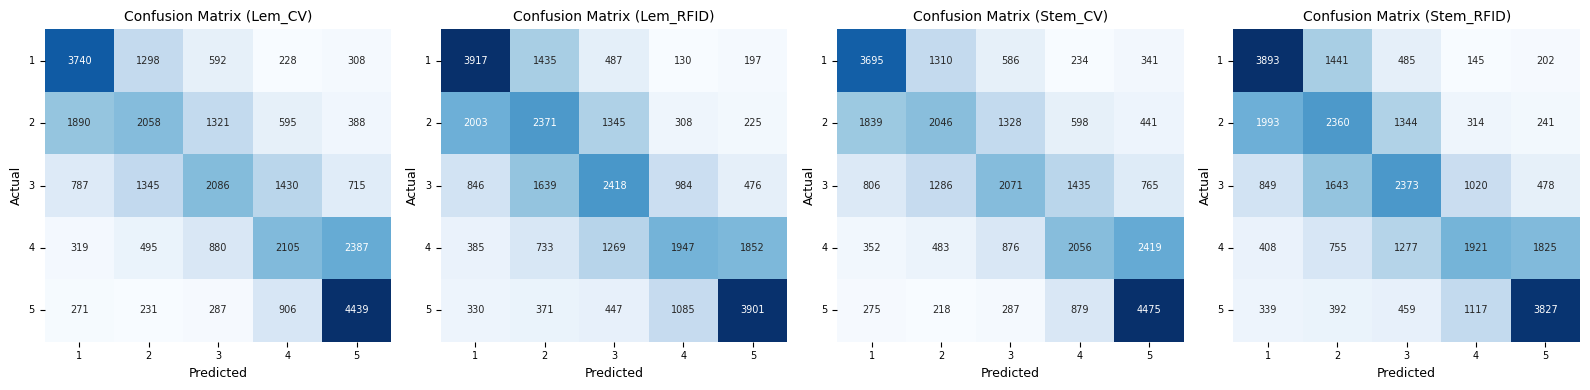

Lem_TFIDF: Train Accuracy - 0.5655, Test Accuracy - 0.4680
Lem_CV: Train Accuracy - 0.5507, Test Accuracy - 0.4639
Stem_TFIDF: Train Accuracy - 0.5472, Test Accuracy - 0.4622
Stem_CV: Train Accuracy - 0.5319, Test Accuracy - 0.4612


In [51]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_nb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_nb_lem_cv, 'Test': accuracy_test_nb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_nb_lem_rfid, 'Test': accuracy_test_nb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_nb_stem_cv, 'Test': accuracy_test_nb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_nb_stem_rfid, 'Test': accuracy_test_nb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 7. Gradient Boosting Classifier

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [53]:
# a) XGBoost on Lemmatized CountVectorized data

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_lem_CV_train, y_train_encoded)
y_pred_train_xgb_lem_cv = xgb_model.predict(X_lem_CV_train)
y_pred_test_xgb_lem_cv = xgb_model.predict(X_lem_CV_test)

# XGBoost classification reports and accuracy scores
xgb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_xgb_lem_cv)
xgb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_xgb_lem_cv)
accuracy_train_xgb_lem_cv = accuracy_score(y_train, y_pred_train_xgb_lem_cv)
accuracy_test_xgb_lem_cv = accuracy_score(y_test, y_pred_test_xgb_lem_cv)

# Print results
print("XGBoost - Classification Report: Train Data (lem_cv):\n", xgb_report_train_lem_cv_imbalanced)
print("\nXGBoost - Classification Report: Test Data (lem_cv):\n", xgb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_xgb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_xgb_lem_cv)

XGBoost - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.78      0.00      0.00      0.00         0
          1       0.17      0.18      0.77      0.17      0.37      0.13     14568
          2       0.15      0.11      0.84      0.13      0.31      0.09     14482
          3       0.17      0.18      0.79      0.18      0.38      0.13     14371
          4       0.23      0.25      0.79      0.24      0.44      0.18     14548
          5       0.00      0.00      1.00      0.00      0.00      0.00     14600

avg / total       0.14      0.14      0.84      0.14      0.30      0.11     72569


XGBoost - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.78      0.00      0.00      0.00         0
          1       0.23      0.25      0.79      0.24    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [54]:
# TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# Convert sparse matrix to dense array
X_lem_CV_train_dense = X_lem_CV_train.toarray()
X_lem_CV_test_dense = X_lem_CV_test.toarray()
X_lem_RFID_train_dense = X_lem_RFID_train.toarray()
X_lem_RFID_test_dense = X_lem_RFID_test.toarray()
X_stem_CV_train_dense = X_stem_CV_train.toarray()
X_stem_CV_test_dense = X_stem_CV_test.toarray()
X_stem_RFID_train_dense = X_stem_RFID_train.toarray()
X_stem_RFID_test_dense = X_stem_RFID_test.toarray()

In [55]:
# a) HistGradientBoosting Classifier on Lemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_CV_train_dense, y_train)
y_pred_train_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_train_dense)
y_pred_test_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_cv)
hist_gb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_cv)
accuracy_train_hist_gb_lem_cv = accuracy_score(y_train, y_pred_train_hist_gb_lem_cv)
accuracy_test_hist_gb_lem_cv = accuracy_score(y_test, y_pred_test_hist_gb_lem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_cv):\n", hist_gb_report_train_lem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_cv):\n", hist_gb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_hist_gb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_hist_gb_lem_cv)

HistGradientBoosting - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.62      0.69      0.89      0.66      0.79      0.61     14568
          2       0.49      0.49      0.87      0.49      0.65      0.41     14482
          3       0.56      0.43      0.92      0.48      0.63      0.37     14371
          4       0.50      0.50      0.87      0.50      0.66      0.42     14548
          5       0.63      0.70      0.90      0.66      0.79      0.61     14600

avg / total       0.56      0.56      0.89      0.56      0.70      0.48     72569


HistGradientBoosting - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.55      0.63      0.87      0.59      0.74      0.54      6166
          2       0.38      0.36      0.85      0.37      0.56      0.29      6252
          3       0.44      0.

In [56]:
# b) HistGradientBoosting Classifier on Lemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_RFID_train_dense, y_train)
y_pred_train_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_train_dense)
y_pred_test_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_rfid)
hist_gb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_rfid)
accuracy_train_hist_gb_lem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_lem_rfid)
accuracy_test_hist_gb_lem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_lem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_tfidf):\n", hist_gb_report_train_lem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_tfidf):\n", hist_gb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_hist_gb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_hist_gb_lem_rfid)

HistGradientBoosting - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.71      0.90      0.67      0.80      0.62     14568
          2       0.51      0.52      0.87      0.51      0.67      0.44     14482
          3       0.58      0.47      0.91      0.52      0.66      0.41     14371
          4       0.54      0.50      0.89      0.52      0.67      0.43     14548
          5       0.65      0.71      0.90      0.68      0.80      0.63     14600

avg / total       0.58      0.58      0.90      0.58      0.72      0.51     72569


HistGradientBoosting - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.55      0.63      0.87      0.59      0.74      0.54      6166
          2       0.38      0.38      0.84      0.38      0.56      0.30      6252
          3       0.44  

In [57]:
# c) HistGradientBoosting Classifier on Stemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_CV_train_dense, y_train)
y_pred_train_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_train_dense)
y_pred_test_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_cv)
hist_gb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_cv)
accuracy_train_hist_gb_stem_cv = accuracy_score(y_train, y_pred_train_hist_gb_stem_cv)
accuracy_test_hist_gb_stem_cv = accuracy_score(y_test, y_pred_test_hist_gb_stem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_cv):\n", hist_gb_report_train_stem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_cv):\n", hist_gb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_hist_gb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_hist_gb_stem_cv)

HistGradientBoosting - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.62      0.70      0.89      0.66      0.79      0.61     14568
          2       0.49      0.49      0.87      0.49      0.66      0.41     14482
          3       0.56      0.43      0.92      0.49      0.63      0.37     14371
          4       0.50      0.50      0.88      0.50      0.66      0.42     14548
          5       0.62      0.70      0.89      0.66      0.79      0.61     14600

avg / total       0.56      0.56      0.89      0.56      0.70      0.49     72569


HistGradientBoosting - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.64      0.87      0.60      0.75      0.55      6166
          2       0.38      0.36      0.85      0.37      0.56      0.29      6252
          3       0.44      

In [58]:
# d) HistGradientBoosting Classifier on Stemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_RFID_train_dense, y_train)
y_pred_train_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_train_dense)
y_pred_test_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_rfid)
hist_gb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_rfid)
accuracy_train_hist_gb_stem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_stem_rfid)
accuracy_test_hist_gb_stem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_stem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_tfidf):\n", hist_gb_report_train_stem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_tfidf):\n", hist_gb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_hist_gb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_hist_gb_stem_rfid)

HistGradientBoosting - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.71      0.90      0.67      0.80      0.63     14568
          2       0.51      0.52      0.88      0.52      0.68      0.44     14482
          3       0.58      0.47      0.92      0.52      0.66      0.41     14371
          4       0.54      0.51      0.89      0.52      0.67      0.43     14548
          5       0.64      0.71      0.90      0.67      0.80      0.63     14600

avg / total       0.58      0.58      0.90      0.58      0.72      0.51     72569


HistGradientBoosting - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.65      0.88      0.60      0.75      0.55      6166
          2       0.38      0.38      0.84      0.38      0.56      0.30      6252
          3       0.44

## Summary - Gradient Boosting

In [59]:
# a) Lemmatized CountVectorized data
hist_gb_report_train_lem_cv_imbalanced_last = [accuracy_train_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_cv_imbalanced_last = [accuracy_test_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_lem_cv_imbalanced_last, hist_gb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_hist_gb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_cv_imbalanced = final_hist_gb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
hist_gb_report_train_lem_rfid_imbalanced_last = [accuracy_train_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_train_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_rfid_imbalanced_last = [accuracy_test_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_lem_rfid_imbalanced_last, hist_gb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_hist_gb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_rfid_imbalanced = final_hist_gb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
hist_gb_report_train_stem_cv_imbalanced_last = [accuracy_train_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_train_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_cv_imbalanced_last = [accuracy_test_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_stem_cv_imbalanced_last, hist_gb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_hist_gb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_cv_imbalanced = final_hist_gb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
hist_gb_report_train_stem_rfid_imbalanced_last = [accuracy_train_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_train_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_rfid_imbalanced_last = [accuracy_test_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_stem_rfid_imbalanced_last, hist_gb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_hist_gb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_rfid_imbalanced = final_hist_gb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Histogram Gradient Boosting Classifier

In [60]:
final_hist_gb_report = pd.concat([final_hist_gb_report_lem_cv_imbalanced,
                    final_hist_gb_report_lem_rfid_imbalanced,
                    final_hist_gb_report_stem_cv_imbalanced,
                    final_hist_gb_report_stem_rfid_imbalanced])

final_hist_gb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,56.161722,0.56,0.56,0.89,0.56,0.70,0.48,72569.0
Lemmatized Count Vectorized,Test,48.149577,0.47,0.48,0.87,0.48,0.64,0.41,31101.0
Lemmatized TFIDF Vectorized,Train,58.267304,0.58,0.58,0.90,0.58,0.72,0.51,72569.0
Lemmatized TFIDF Vectorized,Test,48.429311,0.48,0.48,0.87,0.48,0.64,0.41,31101.0
Stemmatized Count Vectorized,Train,56.316058,0.56,0.56,0.89,0.56,0.70,0.49,72569.0
Stemmatized Count Vectorized,Test,48.438957,0.48,0.48,0.87,0.48,0.64,0.41,31101.0
Stemmatized TFIDF Vectorized,Train,58.431286,0.58,0.58,0.90,0.58,0.72,0.51,72569.0
Stemmatized TFIDF Vectorized,Test,48.763705,0.48,0.49,0.87,0.48,0.65,0.41,31101.0


### Confusion Matrix for Histogram Gradient Boosting

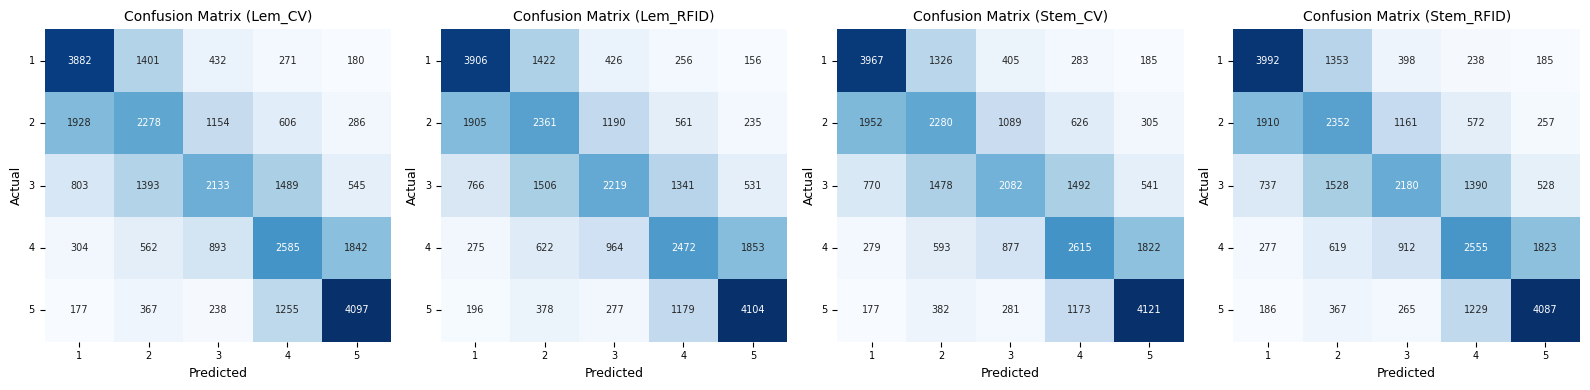

Stem_TFIDF: Train Accuracy - 0.5843, Test Accuracy - 0.4876
Lem_TFIDF: Train Accuracy - 0.5827, Test Accuracy - 0.4843
Stem_CV: Train Accuracy - 0.5632, Test Accuracy - 0.4844
Lem_CV: Train Accuracy - 0.5616, Test Accuracy - 0.4815


In [61]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_hist_gb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_hist_gb_lem_cv, 'Test': accuracy_test_hist_gb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_hist_gb_lem_rfid, 'Test': accuracy_test_hist_gb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_hist_gb_stem_cv, 'Test': accuracy_test_hist_gb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_hist_gb_stem_rfid, 'Test': accuracy_test_hist_gb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# ---------